In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/bidirectional_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 80s 6ms/step


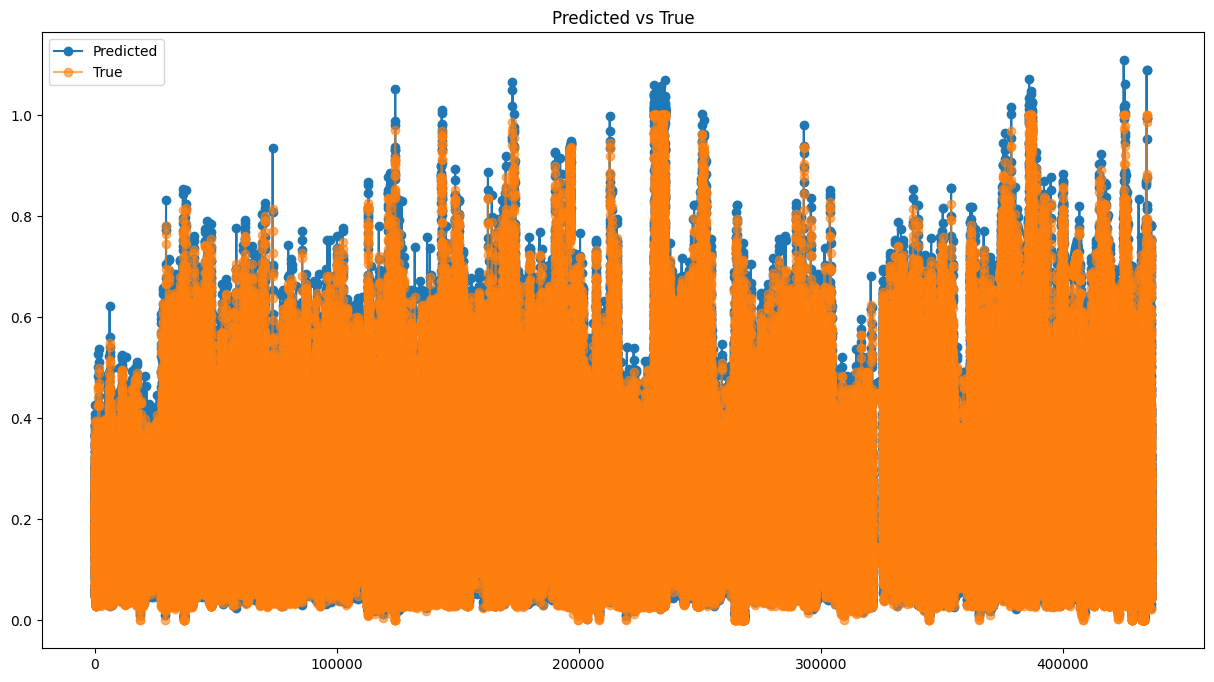

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02894447736897411,
 'mse': 0.0404289357272191,
 'rmse': 0.0016344988440356127}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          152.893402
1          146.309647
2          146.612061
3          144.640564
4          147.451294
...               ...
436585      83.945396
436586     135.475464
436587     173.375763
436588     214.589828
436589     209.284805

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  152.893402
2023-01-01 00:15:00   140.0  146.309647
2023-01-01 00:30:00   139.0  146.612061
2023-01-01 00:45:00   145.0  144.640564
2023-01-01 01:00:00   159.0  147.451294
...                     ...         ...
2035-06-14 18:15:00   137.0   83.945396
2035-06-14 18:30:00   177.0  135.475464
2035-06-14 18:45:00   198.0  173.375763
2035-06-14 19:00:00   216.0  214.589828
2035-06-14 19:15:00   233.0  209.284805

[436590 rows x 2 columns]

AP, BE, EP: (0.905822180586318, 0.07445217355453299, 0.019725645859148995)


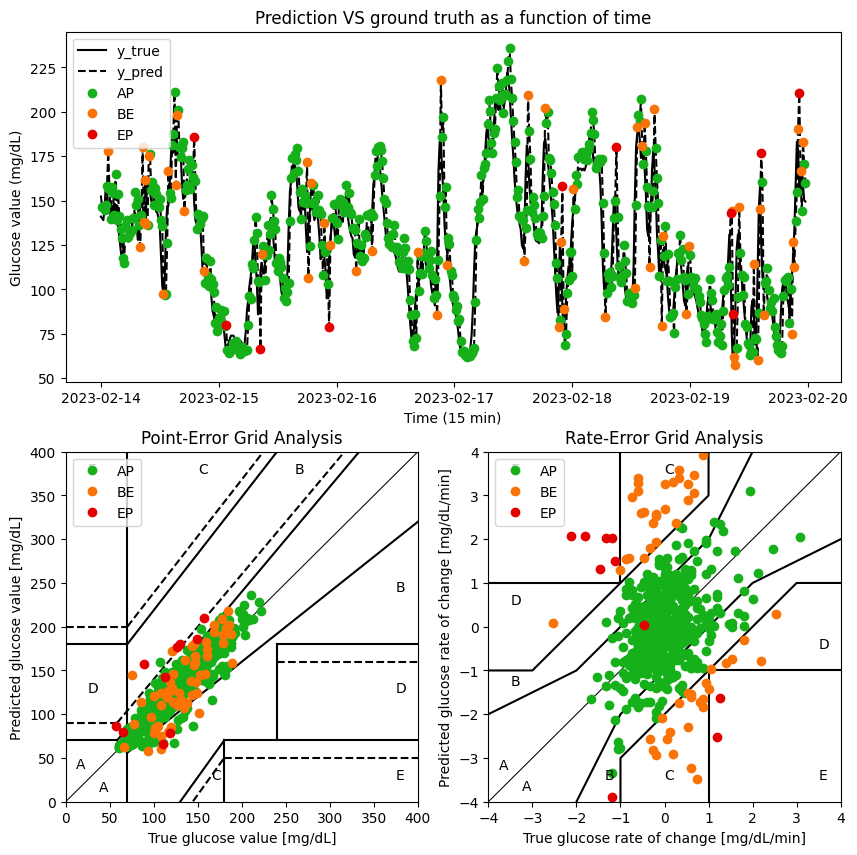

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-14 00:00:00   141.0  152.893402       NaN       NaN    NaN   
1      2023-02-14 00:15:00   140.0  146.309647 -0.066667 -0.438917     AP   
2      2023-02-14 00:30:00   139.0  146.612061 -0.066667  0.020161     AP   
3      2023-02-14 00:45:00   145.0  144.640564  0.400000 -0.131433     AP   
4      2023-02-14 01:00:00   159.0  147.451294  0.933333  0.187382     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-28 18:15:00   137.0   83.945396  2.333333 -0.135382     BE   
436586 2035-07-28 18:30:00   177.0  135.475464  2.666667  3.435338     AP   
436587 2035-07-28 18:45:00   198.0  173.375763  1.400000  2.526687     AP   
436588 2035-07-28 19:00:00   216.0  214.589828  1.200000  2.747604     AP   
436589 2035-07-28 19:15:00   233.0  209.284805  1.133333 -0.353668     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436585     B    lD  
436586     A     A  
436587     A     A  
436588     A     B  
436589     A     B  

[436590 rows x 8 columns]

# Predicción a 60 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 32ms/step


Glucose level Predict  Glucose level True
0               0.245420            0.219565
1               0.231108            0.217391

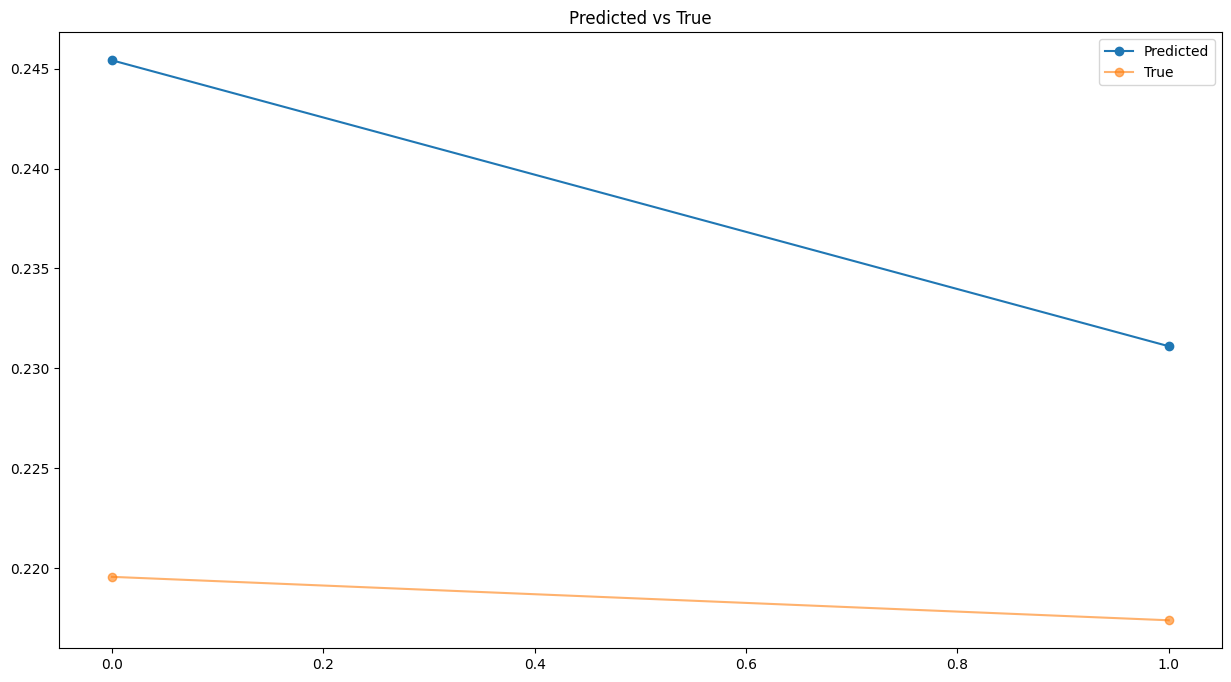

{'mae': 0.019785897498545424,
 'mse': 0.020695842988341547,
 'rmse': 0.00042831791699808597}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             152.893387               141.0
1             146.309647               140.0

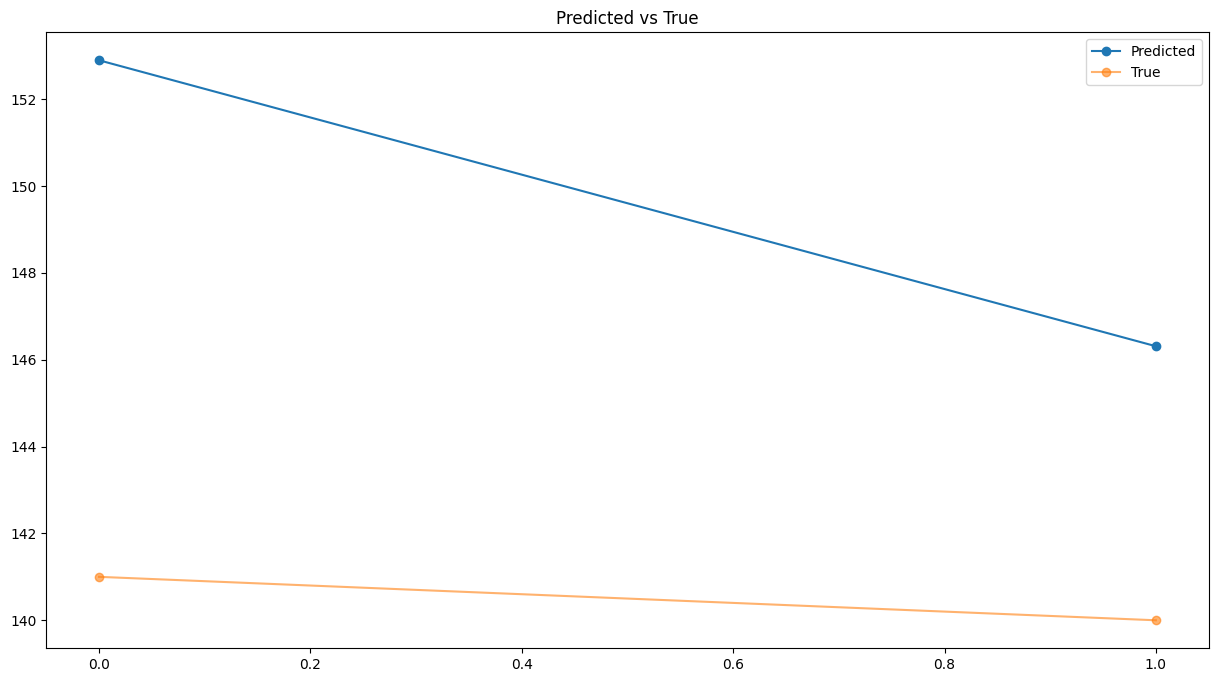

{'mae': 9.101516723632812, 'mse': 9.52009167087231, 'rmse': 90.63214542181231}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 60 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 40ms/step


Glucose level Predict  Glucose level True
0               0.245420            0.219565
1               0.278433            0.217391

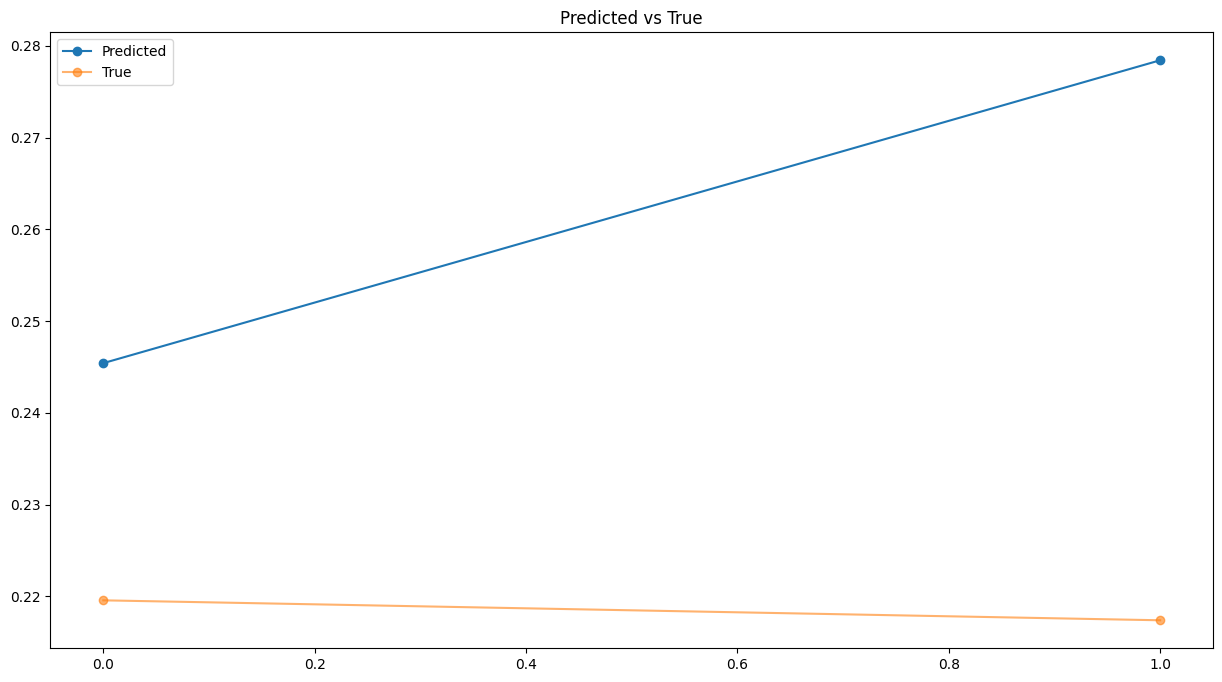

{'mae': 0.043448449736056105,
 'mse': 0.04687525907392327,
 'rmse': 0.002197289913247426}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             152.893402               141.0
1             168.079178               140.0

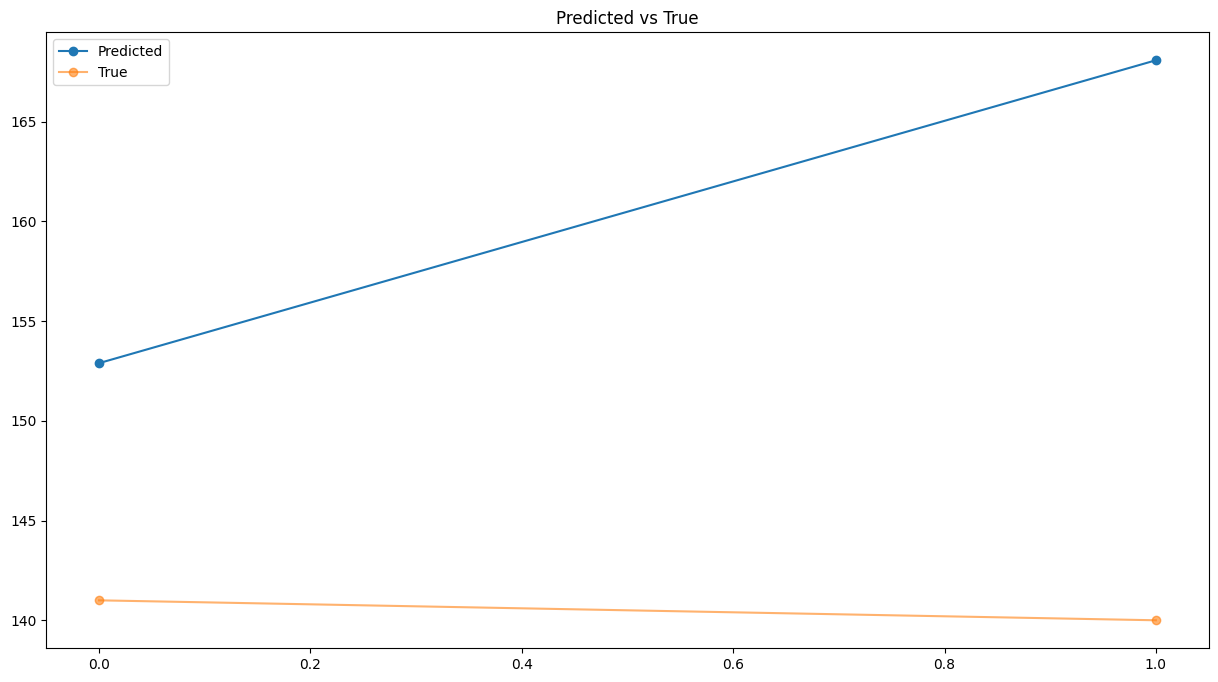

{'mae': 19.986289978027344,
 'mse': 21.562620928320396,
 'rmse': 464.94662129844073}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.269612            0.182609
1               0.241241            0.154348
2               0.120130            0.152174
3               0.171479            0.150000
4               0.152883            0.123913

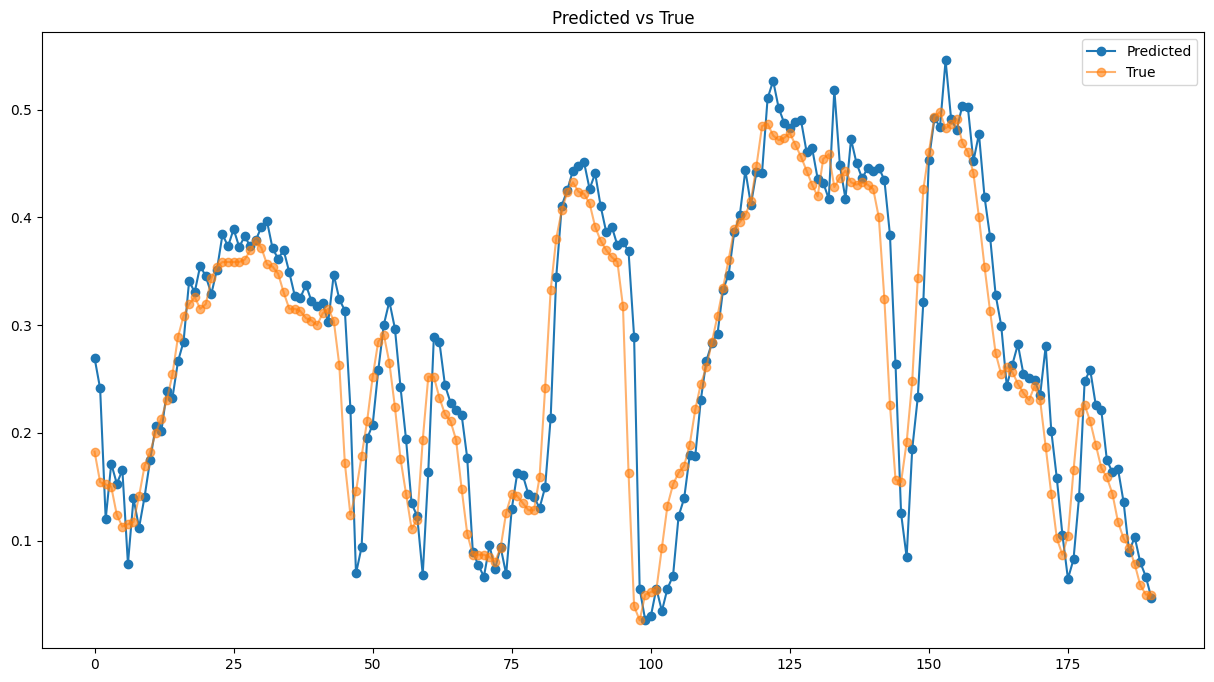

{'mae': 0.036413421854376786,
 'mse': 0.0512390119621917,
 'rmse': 0.0026254363468616246}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

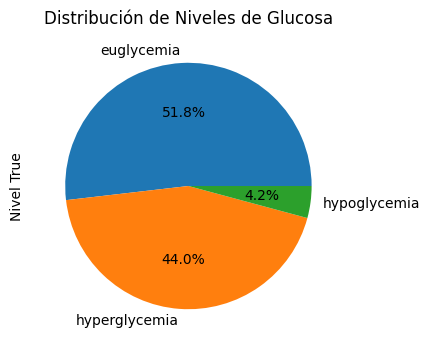

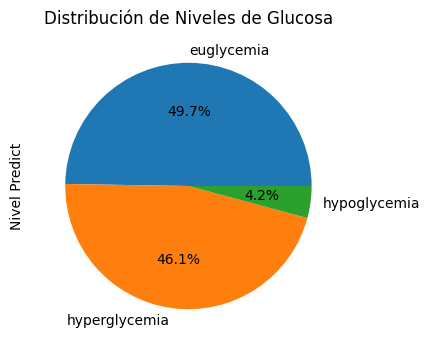

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             164.021530    euglycemia
1               111.0  euglycemia             150.970978    euglycemia
2               110.0  euglycemia              95.259598    euglycemia
3               109.0  euglycemia             118.880501    euglycemia
4                97.0  euglycemia             110.326393    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


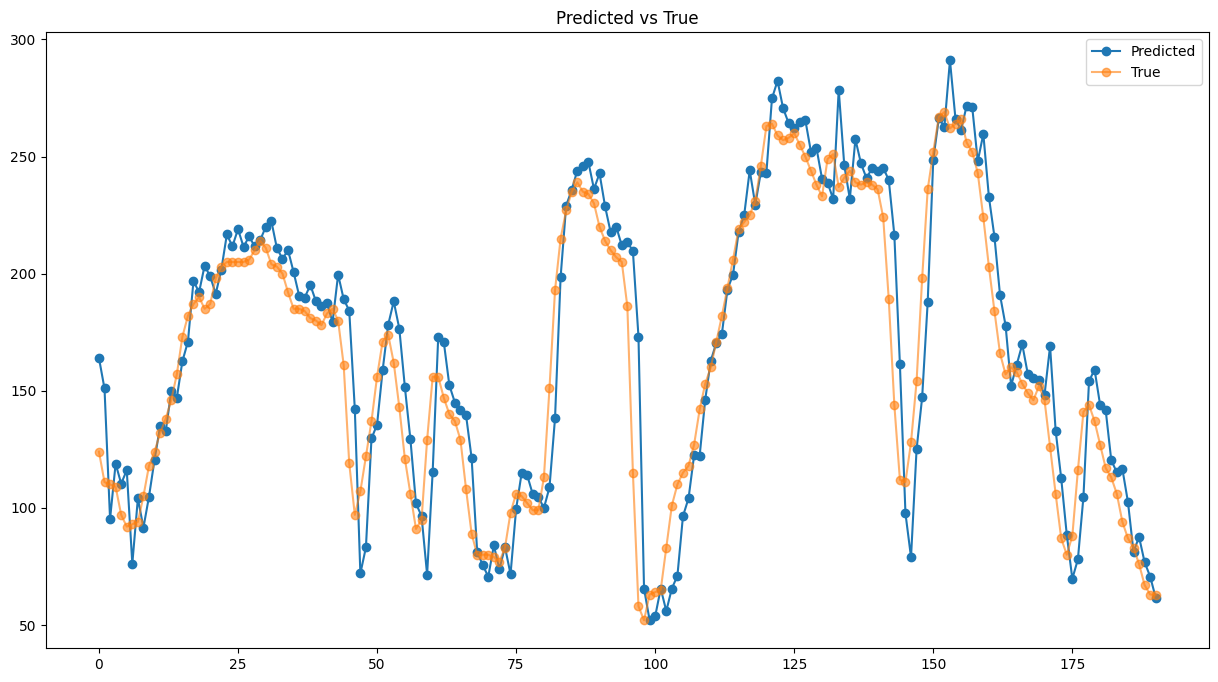

{'mae': 16.750175516018693,
 'mse': 23.569946744348997,
 'rmse': 555.5423895314478}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  164.021530
2023-01-01 00:15:00   111.0  150.970978
2023-01-01 00:30:00   110.0   95.259598
2023-01-01 00:45:00   109.0  118.880501
2023-01-01 01:00:00    97.0  110.326393
...                     ...         ...
2023-01-02 22:30:00    83.0   81.238281
2023-01-02 22:45:00    76.0   87.577774
2023-01-02 23:00:00    67.0   76.759491
2023-01-02 23:15:00    63.0   70.640045
2023-01-02 23:30:00    63.0   61.537334

[191 rows x 2 columns]

AP, BE, EP: (0.8894736842105263, 0.08947368421052632, 0.021052631578947368)


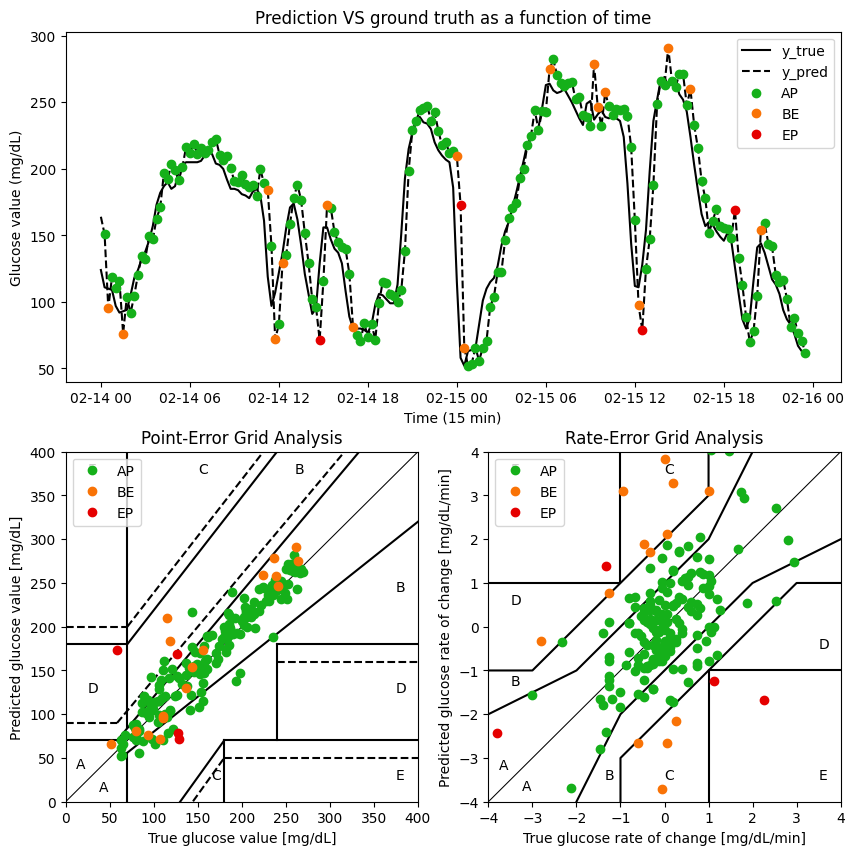

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.346435            0.373913
1               0.392957            0.400000
2               0.411750            0.404348
3               0.440627            0.406522
4               0.410816            0.397826

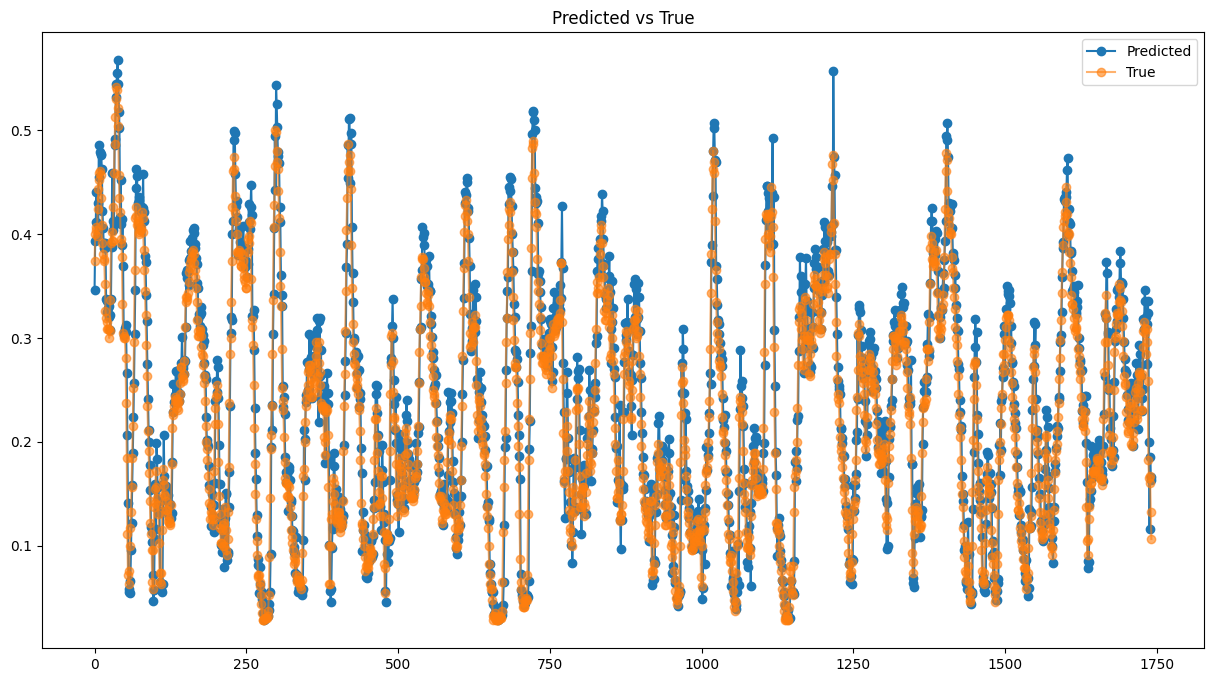

{'mae': 0.025103119732255565,
 'mse': 0.03212023658502657,
 'rmse': 0.0010317095982780794}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

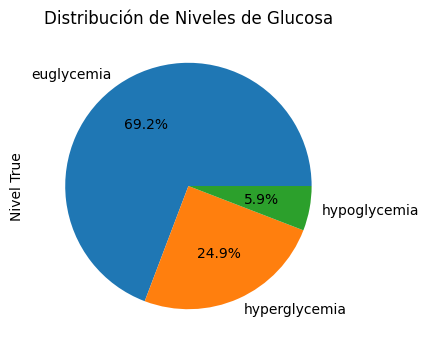

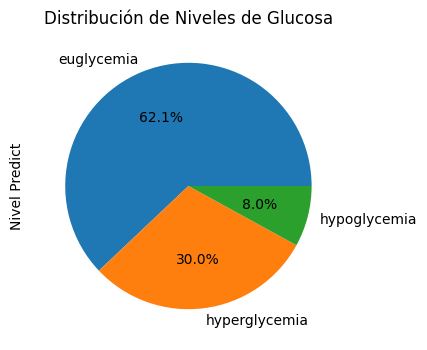

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             199.359894  hyperglycemia
1               224.0  hyperglycemia             220.760025  hyperglycemia
2               226.0  hyperglycemia             229.405136  hyperglycemia
3               227.0  hyperglycemia             242.688339  hyperglycemia
4               223.0  hyperglycemia             228.975281  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


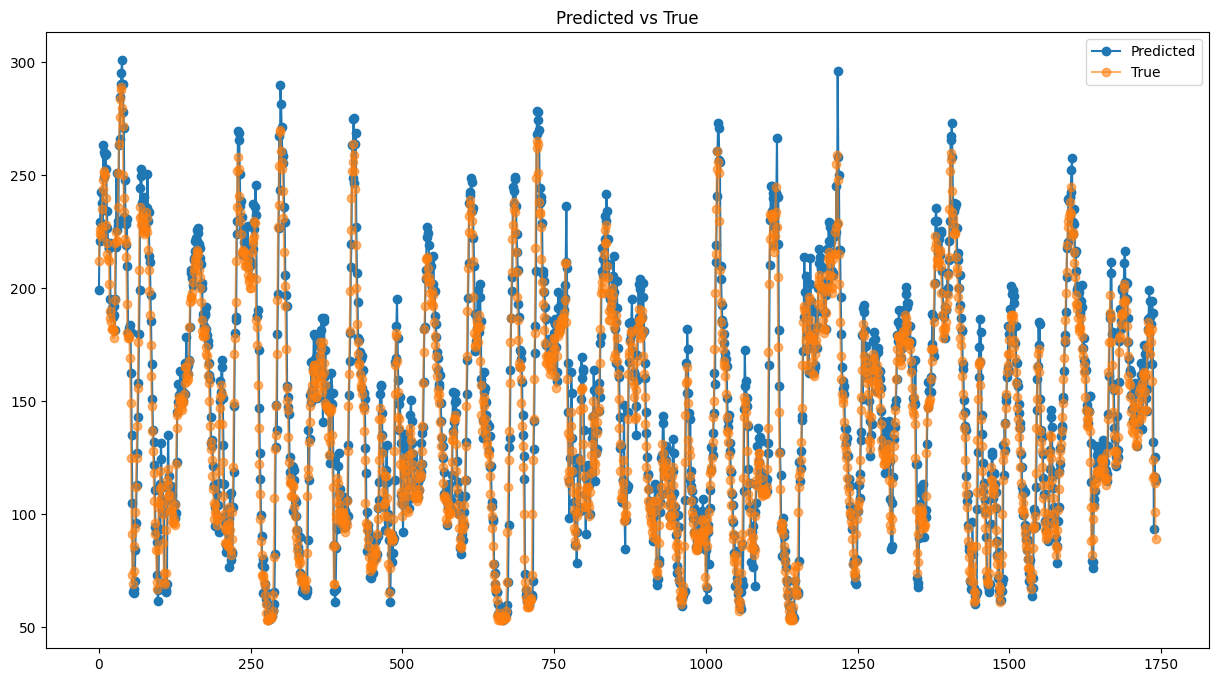

{'mae': 11.547435969846532,
 'mse': 14.775309729344563,
 'rmse': 218.3097775980641}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  199.359894
2023-01-01 00:15:00   224.0  220.760025
2023-01-01 00:30:00   226.0  229.405136
2023-01-01 00:45:00   227.0  242.688339
2023-01-01 01:00:00   223.0  228.975281
...                     ...         ...
2023-01-19 02:15:00   116.0  131.986786
2023-01-19 02:30:00   117.0   93.407097
2023-01-19 02:45:00   114.0  125.381805
2023-01-19 03:00:00   101.0  116.560226
2023-01-19 03:15:00    89.0  114.997505

[1742 rows x 2 columns]

AP, BE, EP: (0.9574956921309592, 0.03446295232624928, 0.0080413555427915)


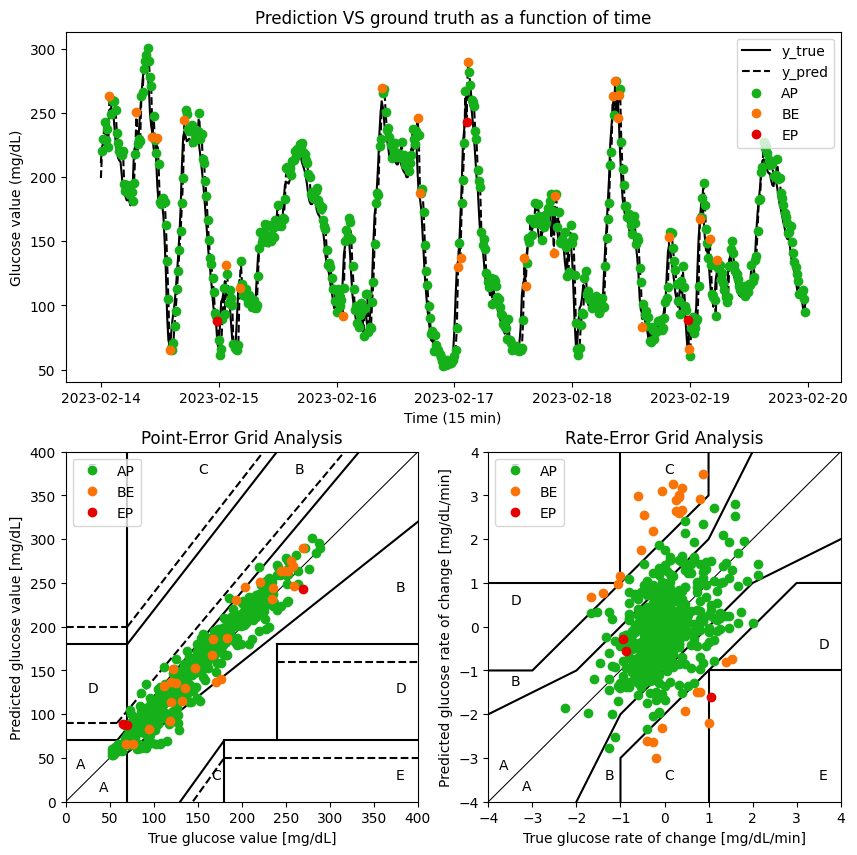

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.319265            0.261858
1               0.275674            0.229051
2               0.242769            0.196245
3               0.210954            0.163439
4               0.170543            0.130632

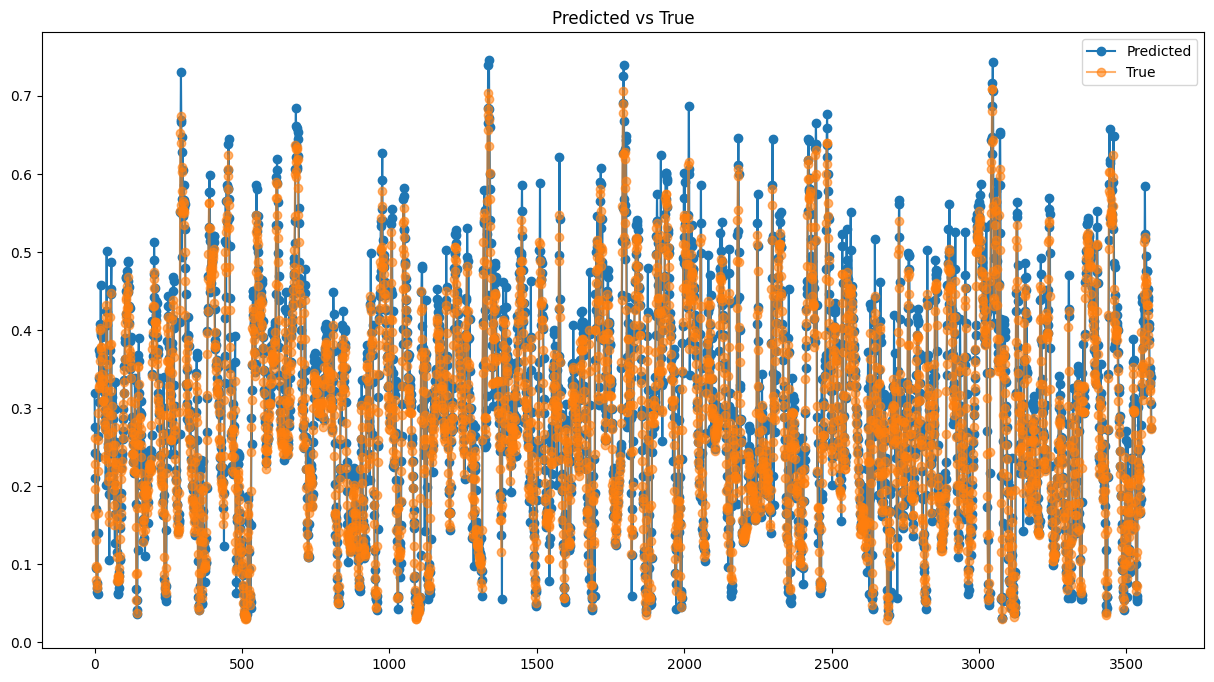

{'mae': 0.03753752674694971,
 'mse': 0.0509905207004903,
 'rmse': 0.0026000332013071297}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

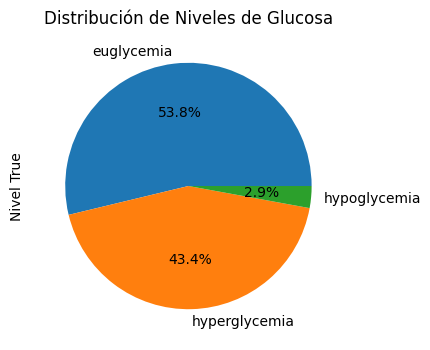

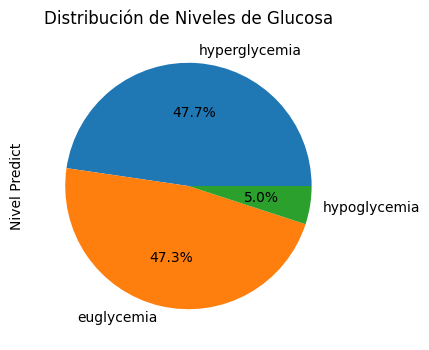

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             186.861694  hyperglycemia
1          145.363636  euglycemia             166.809830     euglycemia
2          130.272727  euglycemia             151.673889     euglycemia
3          115.181818  euglycemia             137.038681     euglycemia
4          100.090909  euglycemia             118.449844     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


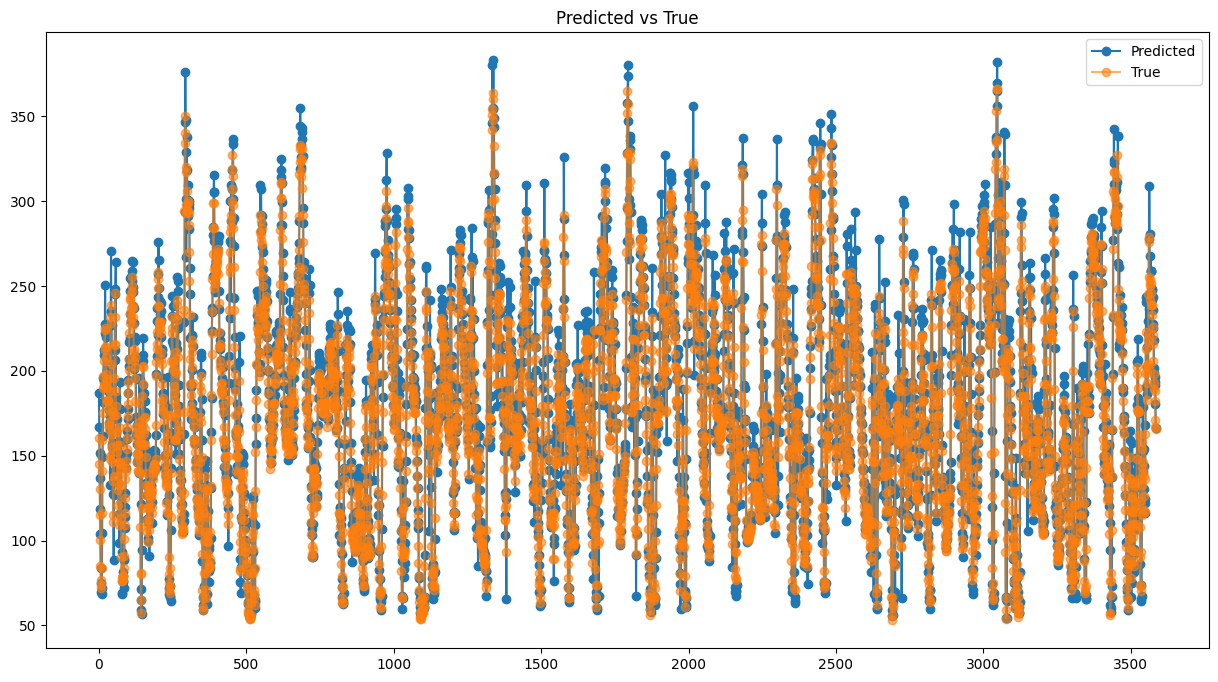

{'mae': 17.26726256856827,
 'mse': 23.455639151589338,
 'rmse': 550.1670080095706}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  186.861694
2023-01-01 00:15:00  145.363636  166.809830
2023-01-01 00:30:00  130.272727  151.673889
2023-01-01 00:45:00  115.181818  137.038681
2023-01-01 01:00:00  100.090909  118.449844
...                         ...         ...
2023-02-07 07:15:00  188.000000  193.560333
2023-02-07 07:30:00  182.000000  191.673950
2023-02-07 07:45:00  171.000000  196.610764
2023-02-07 08:00:00  167.000000  180.173309
2023-02-07 08:15:00  166.000000  166.543488

[3586 rows x 2 columns]

AP, BE, EP: (0.8675034867503487, 0.09707112970711297, 0.03542538354253835)


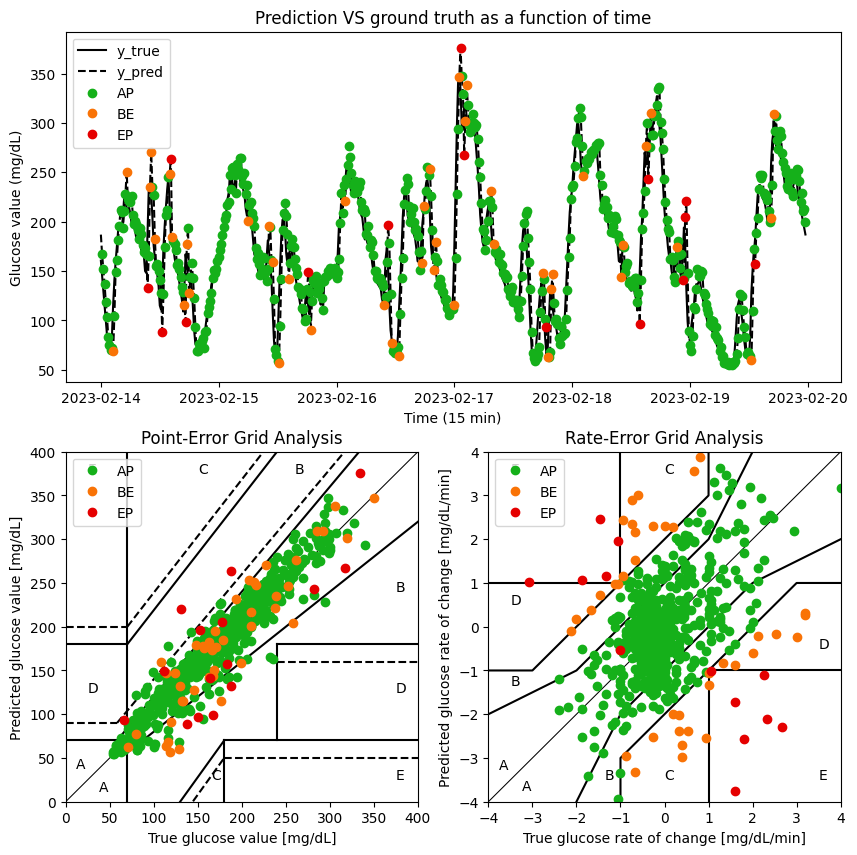

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.553572            0.534783
1               0.560569            0.500000
2               0.538944            0.484783
3               0.474435            0.463043
4               0.497371            0.428261

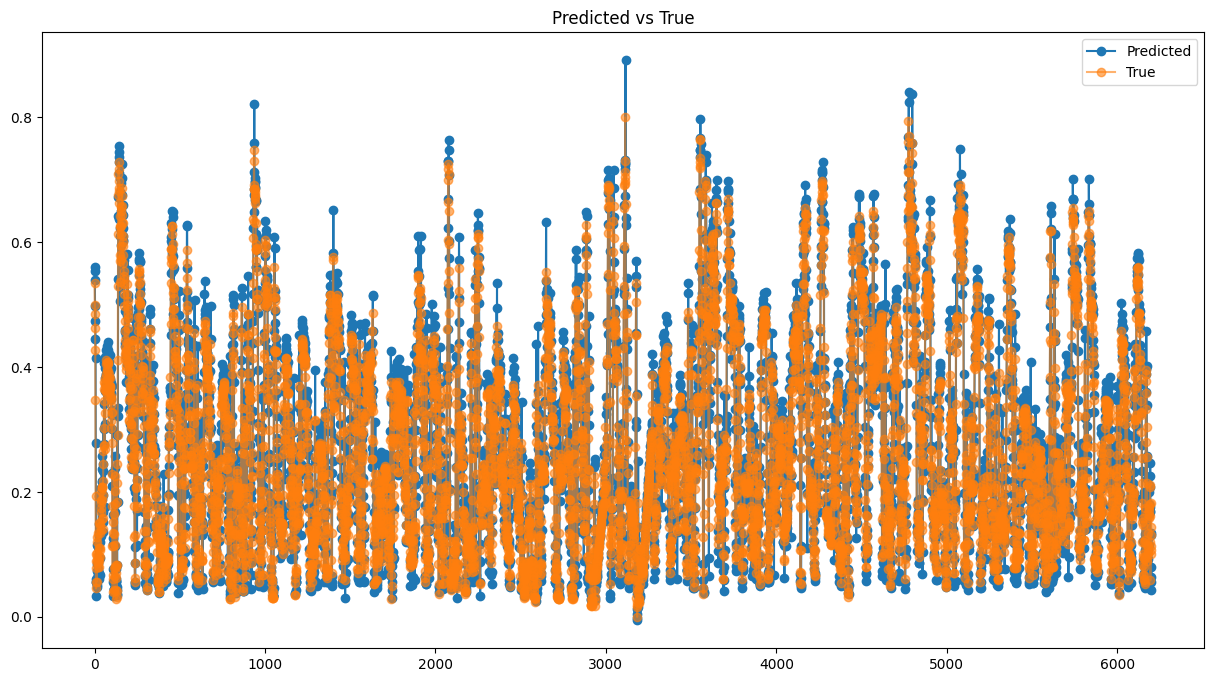

{'mae': 0.04041088674425184,
 'mse': 0.05640862807423786,
 'rmse': 0.0031819333212176957}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

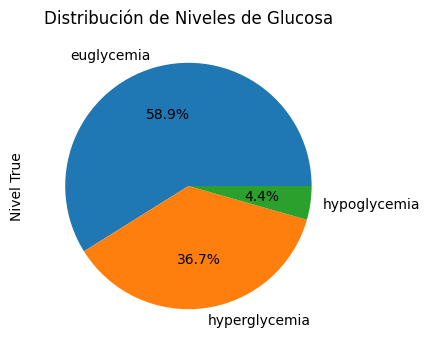

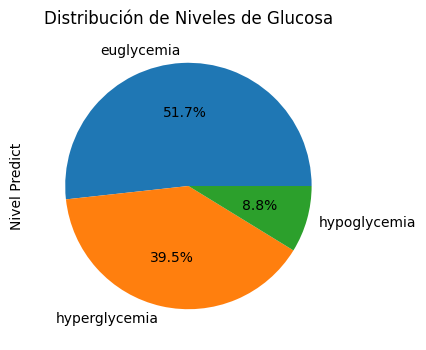

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             294.643097  hyperglycemia
1               270.0  hyperglycemia             297.861847  hyperglycemia
2               263.0  hyperglycemia             287.914185  hyperglycemia
3               253.0  hyperglycemia             258.240143  hyperglycemia
4               237.0  hyperglycemia             268.790497  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


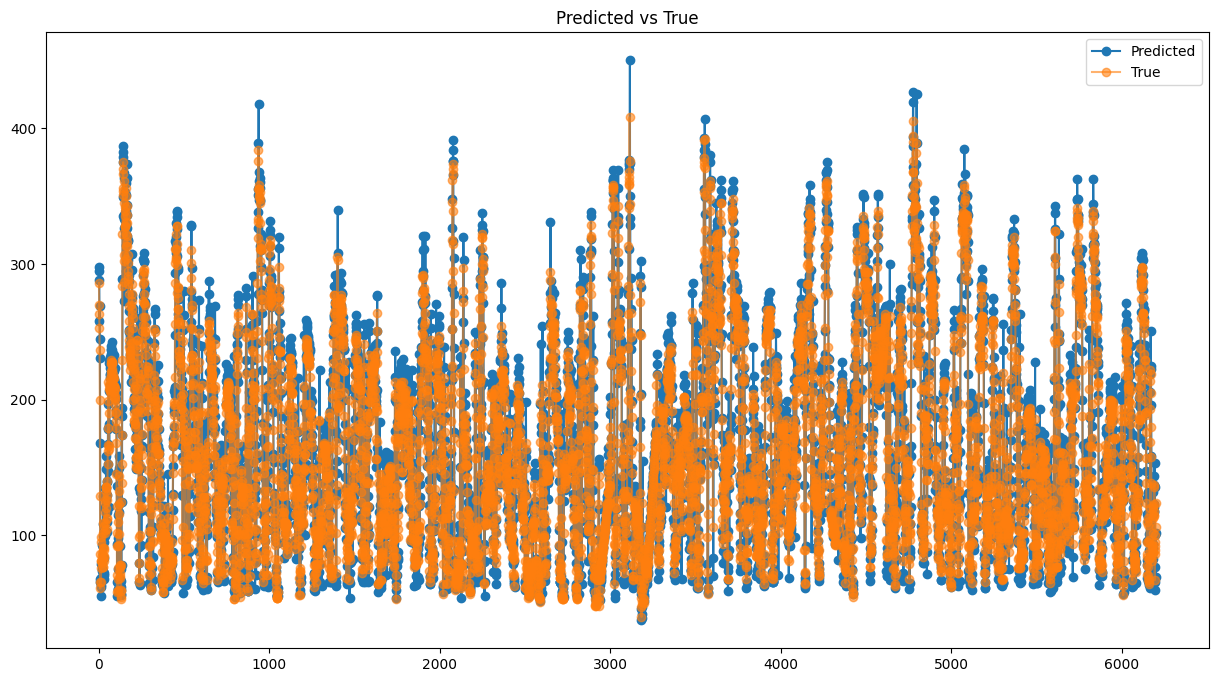

{'mae': 18.589008043888047,
 'mse': 25.947968889922784,
 'rmse': 673.2970895124007}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  294.643097
2023-01-01 00:15:00   270.0  297.861847
2023-01-01 00:30:00   263.0  287.914185
2023-01-01 00:45:00   253.0  258.240143
2023-01-01 01:00:00   237.0  268.790497
...                     ...         ...
2023-03-06 13:00:00   100.0   60.179836
2023-03-06 13:15:00    89.0  100.300774
2023-03-06 13:30:00    92.0   77.092598
2023-03-06 13:45:00   106.0   69.642113
2023-03-06 14:00:00   124.0  102.012749

[6201 rows x 2 columns]

AP, BE, EP: (0.819516129032258, 0.13403225806451613, 0.04645161290322581)


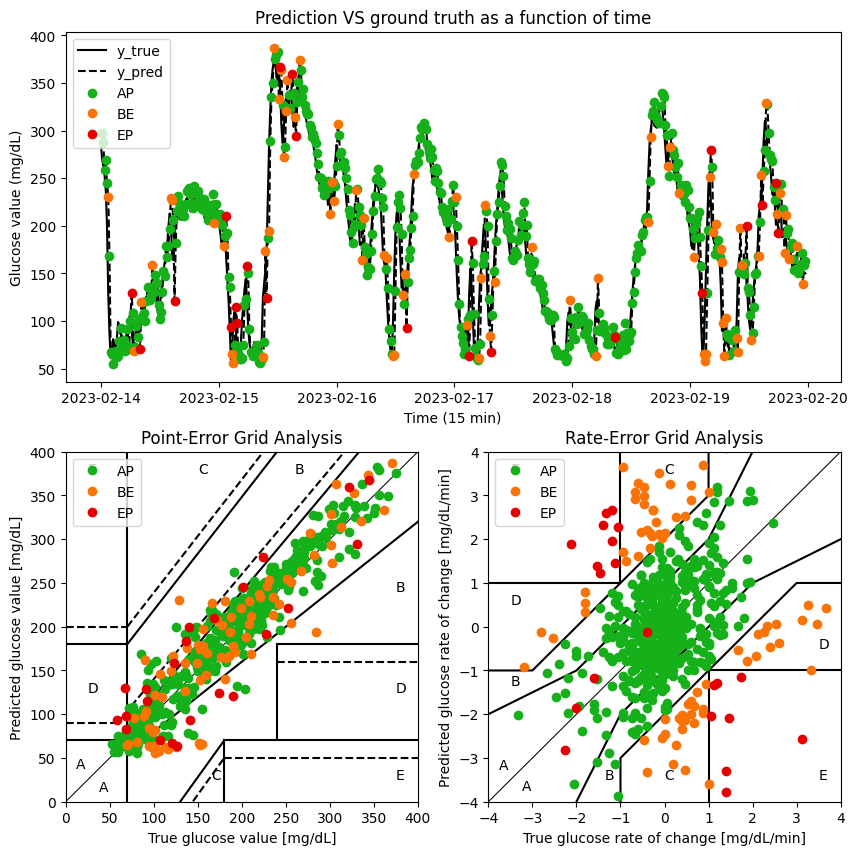

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)